<a href="https://colab.research.google.com/github/BelemoualemChaimae/Diagnostic-of-diabete-/blob/main/diabetes_Clustering_With_the_whole_variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import absolute_import, division, print_function  
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import precision_score,f1_score, precision_score,recall_score
# import random undersampling and other necessary libraries 
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.externals import joblib

%matplotlib inline

In [ ]:
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#diabetes_df.drop('Insulin',inplace=True, axis=1)
 #diabetes_df.drop('SkinThickness',inplace=True, axis=1)
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Pre-Processing step 

In [ ]:
def clean_data(df_raw,cols_with_zeros=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'],response = ['Outcome']):
    df = df_raw.copy()
    # replace zero with NaN in features
    df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)
    # change response data type to int
    df[response] = df[response].astype('int')
    return df
 
diabetes_df = clean_data(diabetes_df)
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
#Exploring the missing value
print("Proportion of missing values")
missing_values_count = diabetes_df.isna().sum()*100/diabetes_df.shape[0]
features_with_missing_values = missing_values_count[missing_values_count > 0].index.values
missing_values_count

Proportion of missing values


NameError: ignored

In [ ]:
diabetes_df.dropna(subset = ["Insulin"], inplace=True)
#diabetes_df.reset_index(drop=True)

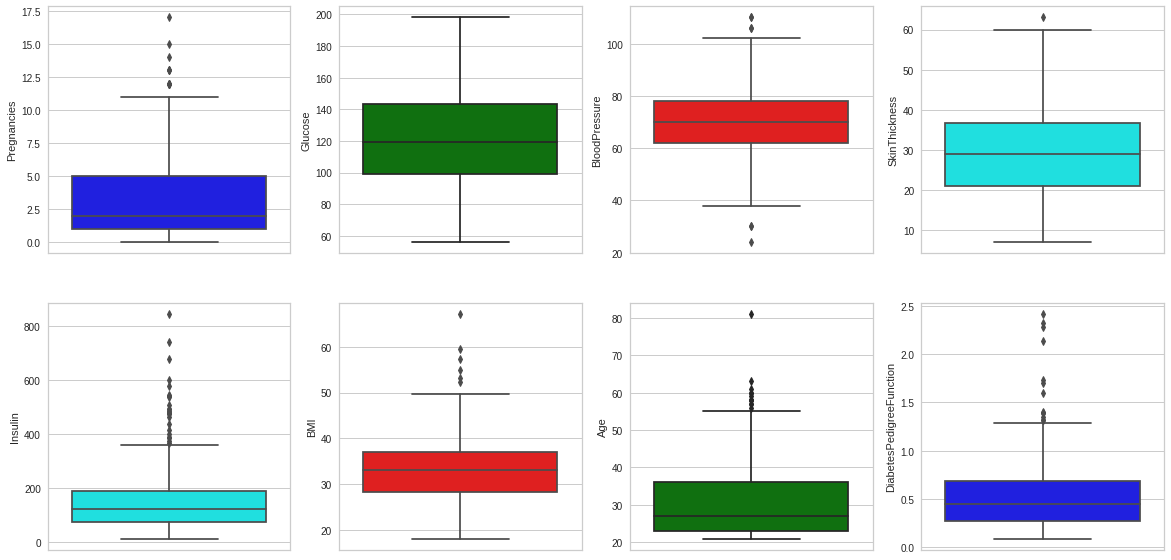

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
sns.boxplot(y = diabetes_df.Pregnancies,color='blue')
plt.subplot(2,4,2)
sns.boxplot(y = diabetes_df.Glucose,color='green')
plt.subplot(2,4,3)
sns.boxplot(y = diabetes_df.BloodPressure,color='red')
plt.subplot(2,4,4)
sns.boxplot(y = diabetes_df.SkinThickness,color='cyan')
plt.subplot(2,4,5)
sns.boxplot(y = diabetes_df.Insulin,color='cyan')
plt.subplot(2,4,6)
sns.boxplot(y = diabetes_df.BMI,color='red')
plt.subplot(2,4,7)
sns.boxplot(y = diabetes_df.Age,color='green')
plt.subplot(2,4,8)
sns.boxplot(y = diabetes_df.DiabetesPedigreeFunction,color='blue')
plt.show()

In [ ]:
#Exploring the missing value
print("Proportion of missing values")
missing_values_count = diabetes_df.isna().sum()*100/diabetes_df.shape[0]
features_with_missing_values = missing_values_count[missing_values_count > 0].index.values
missing_values_count

Proportion of missing values


Pregnancies                 0.000000
Glucose                     0.253807
BloodPressure               0.000000
SkinThickness               0.000000
Insulin                     0.000000
BMI                         0.253807
DiabetesPedigreeFunction    0.000000
Age                         0.000000
Outcome                     0.000000
dtype: float64

In [ ]:
# Dealing with missing values #Techniques pour traiter les valeurs manquantes
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
 
# function for KNN model-based imputation of missing values using features without NaN as predictors
def impute_model_basic(df):
  cols_nan = df.columns[df.isna().any()].tolist()
  cols_no_nan = df.columns.difference(cols_nan).values
  for col in cols_nan:
      test_data = df[df[col].isna()]
      train_data = df.dropna()
      knr = KNeighborsRegressor(n_neighbors=5).fit(train_data[cols_no_nan], train_data[col])
      df.loc[df[col].isna(), col] = knr.predict(test_data[cols_no_nan])
  return df
 

In [ ]:
diabetes_df=impute_model_basic(diabetes_df)
diabetes_df.reset_index(drop=True)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
1,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
2,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
3,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
4,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
389,0,181.0,88.0,44.0,510.0,43.3,0.222,26,1
390,1,128.0,88.0,39.0,110.0,36.5,1.057,37,1
391,2,88.0,58.0,26.0,16.0,28.4,0.766,22,0
392,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0


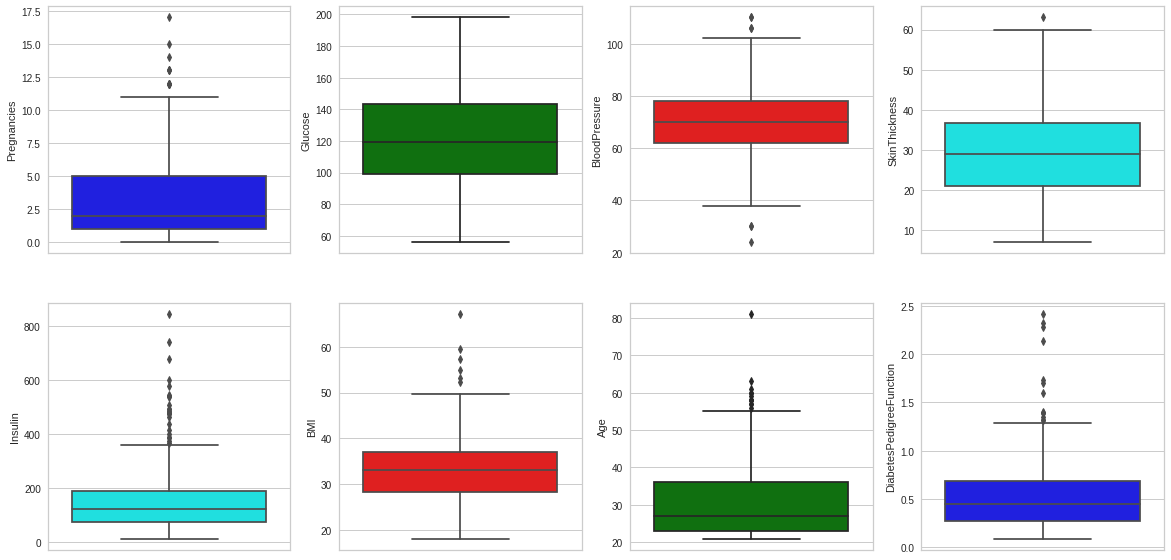

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
sns.boxplot(y = diabetes_df.Pregnancies,color='blue')
plt.subplot(2,4,2)
sns.boxplot(y = diabetes_df.Glucose,color='green')
plt.subplot(2,4,3)
sns.boxplot(y = diabetes_df.BloodPressure,color='red')
plt.subplot(2,4,4)
sns.boxplot(y = diabetes_df.SkinThickness,color='cyan')
plt.subplot(2,4,5)
sns.boxplot(y = diabetes_df.Insulin,color='cyan')
plt.subplot(2,4,6)
sns.boxplot(y = diabetes_df.BMI,color='red')
plt.subplot(2,4,7)
sns.boxplot(y = diabetes_df.Age,color='green')
plt.subplot(2,4,8)
sns.boxplot(y = diabetes_df.DiabetesPedigreeFunction,color='blue')
plt.show()

In [ ]:
#removing outliers
diabetes_df=diabetes_df[diabetes_df['Insulin']<=340]
diabetes_df.shape

(368, 9)

In [ ]:
diabetes_df.reset_index(drop=True)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
1,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
2,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
3,5,166.0,72.0,19.0,175.0,25.8,0.587,51,1
4,0,118.0,84.0,47.0,230.0,45.8,0.551,31,1
...,...,...,...,...,...,...,...,...,...
363,1,121.0,78.0,39.0,74.0,39.0,0.261,28,0
364,1,128.0,88.0,39.0,110.0,36.5,1.057,37,1
365,2,88.0,58.0,26.0,16.0,28.4,0.766,22,0
366,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0


In [ ]:
diabetes_df.groupby('Outcome').count()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,253,253,253,253,253,253,253,253
1,115,115,115,115,115,115,115,115


In [ ]:
#Split the data
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["Outcome"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=11111)


In [ ]:
#Normalisation des données 
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [ ]:
diabetesCheck_logistic = LogisticRegression()
diabetesCheck_logistic.fit(X_train_norm, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
accuracy = diabetesCheck_logistic.score(X_test_norm, y_test)
print("accuracy = ", accuracy * 100, "%")

accuracy =  81.08108108108108 %


Text(0.5, 0, 'Importance')

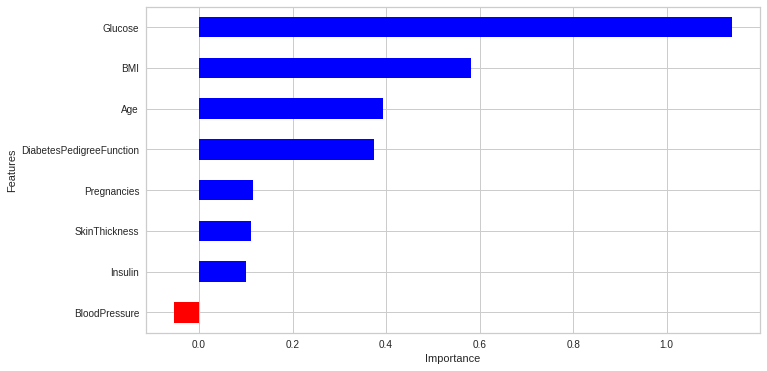

In [ ]:
coeff = list(diabetesCheck_logistic.coef_[0])
labels = list(diabetes_df.columns[:-1])
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

In [ ]:
from sklearn.feature_selection import RFECV
rfe = RFECV(estimator=LogisticRegression())
rfe = rfe.fit(X_train_norm, y_train)
print(rfe.support_)
print(rfe.ranking_)

[False  True False False False  True  True  True]
[2 1 5 3 4 1 1 1]


In [ ]:
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df_diabetes_new=diabetes_df.copy()
df_diabetes_new.drop('SkinThickness',axis=1,inplace=True)
df_diabetes_new.drop('Insulin',axis=1,inplace=True)
df_diabetes_new.reset_index(drop=True,inplace=True)

In [ ]:
X_new=df_diabetes_new.iloc[:, :-1].values
y_new = df_diabetes_new["Outcome"].values
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y_new, test_size=0.1, random_state=11111)
X_train_d=X_new_train
y_train_d=y_new_train
X_test_d=X_new_test
y_test_d=y_new_test

In [ ]:
from imblearn.over_sampling import RandomOverSampler
# define undersampling strategy-- Balancing the data (lesss importante data is small ! )
undersample =RandomOverSampler(sampling_strategy='minority')

# fit and apply the transform
X_train_d, y_train_d = undersample.fit_resample(X_train_d, y_train_d)
# summarize class distribution
print("After undersampling: ", Counter(y_train_d))

After undersampling:  Counter({0: 230, 1: 230})


In [ ]:
#from imblearn.over_sampling import SMOTE

#smt = SMOTE()
#X_train_d, y_train_d = smt.fit_sample(X_train_d, y_train_d)
#np.bincount(y_train_d)

In [ ]:
#Normalisation des données 
normalizer = StandardScaler()
X_new_train_norm = normalizer.fit_transform(X_new_train)
X_new_test_norm = normalizer.transform(X_new_test)

In [ ]:
diabetesCheck_logistic_without_variables = LogisticRegression()
diabetesCheck_logistic_without_variables.fit(X_new_train_norm, y_new_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
accuracy = diabetesCheck_logistic_without_variables.score(X_new_test_norm, y_new_test)
print("accuracy = ", accuracy * 100, "%")

accuracy =  83.78378378378379 %


In [ ]:
People_Diabetes=df_diabetes_new[df_diabetes_new['Outcome']==1]
People_Diabetes.drop(columns=['Outcome'],inplace=True)
People_Diabetes.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
1,0,137.0,40.0,43.1,2.288,33
2,3,78.0,50.0,31.0,0.248,26
3,5,166.0,72.0,25.8,0.587,51
4,0,118.0,84.0,45.8,0.551,31
6,1,115.0,70.0,34.6,0.529,32


In [ ]:
People_NDiabetes=df_diabetes_new[df_diabetes_new['Outcome']==0]
People_NDiabetes.drop(columns=['Outcome'],inplace=True)
People_NDiabetes.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
0,1,89.0,66.0,28.1,0.167,21
5,1,103.0,30.0,43.3,0.183,33
7,3,126.0,88.0,39.3,0.704,27
10,1,97.0,66.0,23.2,0.487,22
11,13,145.0,82.0,22.2,0.245,57


Clustering Methods -Choosing the appropriate parameters 

In [ ]:
!pip install -U yellowbrick

Requirement already up-to-date: yellowbrick in /usr/local/lib/python3.7/dist-packages (1.3.post1)


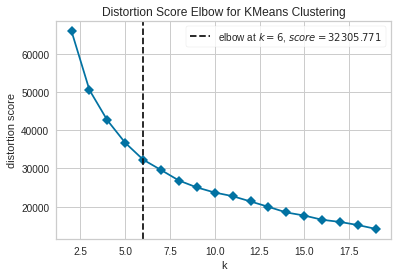

In [ ]:
#The number of clusters for people who have diabete
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,20), metric='distortion', timings=False)

visualizer.fit(People_Diabetes)        # Fit the data to the visualizer
visualizer.show()

K-means 

In [ ]:
K_People_Diabetes=KMeans(n_clusters=3)
K_People_Diabetes = K_People_Diabetes.fit(People_Diabetes)
y_labels_train = K_People_Diabetes.labels_

In [ ]:
People_Diabetes['Outnew']=y_labels_train

In [ ]:
People_Diabetes['Outnew']=People_Diabetes['Outnew'].map({0:'diab_0',1:'diab_1',2:'diab_2'})
People_Diabetes.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outnew
1,0,137.0,40.0,43.1,2.288,33,diab_1
2,3,78.0,50.0,31.0,0.248,26,diab_2
3,5,166.0,72.0,25.8,0.587,51,diab_0
4,0,118.0,84.0,45.8,0.551,31,diab_1
6,1,115.0,70.0,34.6,0.529,32,diab_2


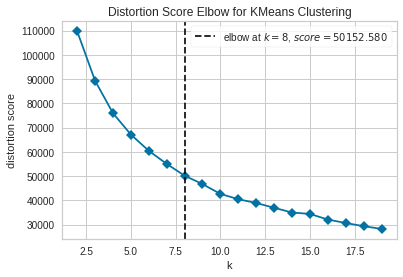

In [ ]:
#The number of clusters for people who doesn't have diabete
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,20), metric='distortion', timings=False)

visualizer.fit(People_NDiabetes)        # Fit the data to the visualizer
visualizer.show()

In [ ]:
K_People_NDiabetes=KMeans(n_clusters=3)
K_People_NDiabetes = K_People_NDiabetes.fit(People_NDiabetes)
y_labels_train = K_People_NDiabetes.labels_

In [ ]:
People_NDiabetes['Outnew']=y_labels_train

In [ ]:
People_NDiabetes['Outnew']=People_NDiabetes['Outnew'].map({0:'Ndiab_0',1:'Ndiab_1',2:'Ndiab_2'})
People_NDiabetes.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outnew
0,1,89.0,66.0,28.1,0.167,21,Ndiab_0
5,1,103.0,30.0,43.3,0.183,33,Ndiab_0
7,3,126.0,88.0,39.3,0.704,27,Ndiab_2
10,1,97.0,66.0,23.2,0.487,22,Ndiab_0
11,13,145.0,82.0,22.2,0.245,57,Ndiab_1


In [ ]:
df_final=pd.concat([People_Diabetes, People_NDiabetes],ignore_index=False)
df_final.sort_index(inplace=True)
df_final.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outnew
0,1,89.0,66.0,28.1,0.167,21,Ndiab_0
1,0,137.0,40.0,43.1,2.288,33,diab_1
2,3,78.0,50.0,31.0,0.248,26,diab_2
3,5,166.0,72.0,25.8,0.587,51,diab_0
4,0,118.0,84.0,45.8,0.551,31,diab_1


In [ ]:
df_final['Outnew']=df_final['Outnew'].map({'Ndiab_0':0,'Ndiab_1':1,'Ndiab_2':2,'diab_0':5,'diab_1':6,'diab_2':7})
df_final.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outnew
0,1,89.0,66.0,28.1,0.167,21,0
1,0,137.0,40.0,43.1,2.288,33,6
2,3,78.0,50.0,31.0,0.248,26,7
3,5,166.0,72.0,25.8,0.587,51,5
4,0,118.0,84.0,45.8,0.551,31,6


In [ ]:
X_multiclass=df_final.iloc[:, :-1].values
y_multiclass = df_final["Outnew"].values
X_multiclass_train, X_multiclass_test, y_multiclass_train, y_multiclass_test = train_test_split(X_multiclass, y_multiclass, test_size=0.1, random_state=11111)

In [ ]:
#Normalisation des données 
normalizer = StandardScaler()
X_multiclass_train_norm = normalizer.fit_transform(X_multiclass_train)
X_multiclass_test_norm = normalizer.transform(X_multiclass_test)

In [ ]:
#Testing with SVM

In [ ]:
#Training the SVM Model with encoded features
from sklearn.svm import SVC

clf = SVC(kernel = 'sigmoid', C =1)
clf.fit(X_multiclass_train_norm, y_multiclass_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred_class_SVM_n = clf.predict(X_multiclass_test_norm)
print('accuracy is {:.3f}'.format(accuracy_score(y_multiclass_test,y_pred_class_SVM_n)))

accuracy is 0.757


Visualisation of clusters

In [ ]:
from sklearn.decomposition import PCA
pca_diabetes = PCA(n_components=2)
principalComponents_diabetes = pca_diabetes.fit_transform(X_new_train_norm)

In [ ]:
#Ploting the clusters 
#plt.scatter(principalComponents_diabetes[K_meanse.labels_==0,0],principalComponents_diabetes[K_meanse.labels_==0,1],s=50,color='red')
#plt.scatter(principalComponents_diabetes[K_meanse.labels_==1,0],principalComponents_diabetes[K_meanse.labels_==1,1],s=50,color='blue')
#plt.scatter(principalComponents_diabetes[K_meanse.labels_==2,0],principalComponents_diabetes[K_meanse.labels_==2,1],s=50,color='yellow')
#plt.scatter(principalComponents_diabetes[K_meanse.labels_==3,0],principalComponents_diabetes[K_meanse.labels_==3,1],s=50,color='cyan')
#plt.scatter(principalComponents_diabetes[K_meanse.labels_==4,0],principalComponents_diabetes[K_meanse.labels_==4,1],s=50,color='green')
#plt.scatter(principalComponents_diabetes[K_meanse.labels_==5,0],principalComponents_diabetes[K_meanse.labels_==5,1],s=50,color='orange')
#plt.scatter(principalComponents_diabetes[K_meanse.labels_==6,0],principalComponents_diabetes[K_meanse.labels_==6,1],s=50,color='pink')
#plt.scatter(principalComponents_diabetes[K_meanse.labels_==7,0],principalComponents_diabetes[K_meanse.labels_==7,1],s=50,color='purple')


Classification

Using K-mean as new Class for our classifier model

In [ ]:
#df_train_norm=pd.DataFrame(X_new_train_norm,columns=df_diabetes_new.columns[:-1])
#df_train_norm['y_kmeas_train']=y_labels_train
#df_train_norm.head()

In [ ]:
#df_test_norm=pd.DataFrame(X_new_test_norm,columns=df_diabetes_new.columns[:-1])
#df_test_norm['df_test_norm']=y_labels_test
#df_test_norm.head()

Classification with new classes Obtained with K-Means

In [ ]:
#Training the SVM Model with encoded features
#from sklearn.svm import SVC
#clf = SVC(kernel = 'sigmoid', C =1000, gamma = 0.0001 )
#clf.fit(df_train_norm, y_labels_train)

In [ ]:
#y_pred_class_SVM_n = clf.predict(df_test_norm)
#print('accuracy is {:.3f}'.format(accuracy_score(y_labels_test,y_pred_class_SVM_n)))

GridSearch For Estimating the parameters of the Model 

In [ ]:
#from sklearn.model_selection import GridSearchCV
  
# defining parameter range
#param_grid = {'C': [0.1, 1, 10, 100, 1000], 
             # 'gamma': [1, 0.1, 0.01, 0.09, 0.0001],
             # 'kernel': ['rbf','sigmoid']} 
              
#grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
#grid.fit(df_train_norm, y_train)

In [ ]:
# print best parameter after tuning
#print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
#print(grid.best_estimator_)

In [ ]:
#df_result_gridSearch=pd.DataFrame(grid.cv_results_)
#df_result_gridSearch[['param_C','param_gamma','param_kernel','mean_test_score']]

Decison Tree

In [ ]:
#Try decision Tree ! 
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train_d, y_train_d)

#Predict the response for test dataset
y_pred = clf.predict(X_test_d)
print("Accuracy:",accuracy_score(y_test_d, y_pred))

Accuracy: 0.7837837837837838


In [ ]:
!pip install graphviz

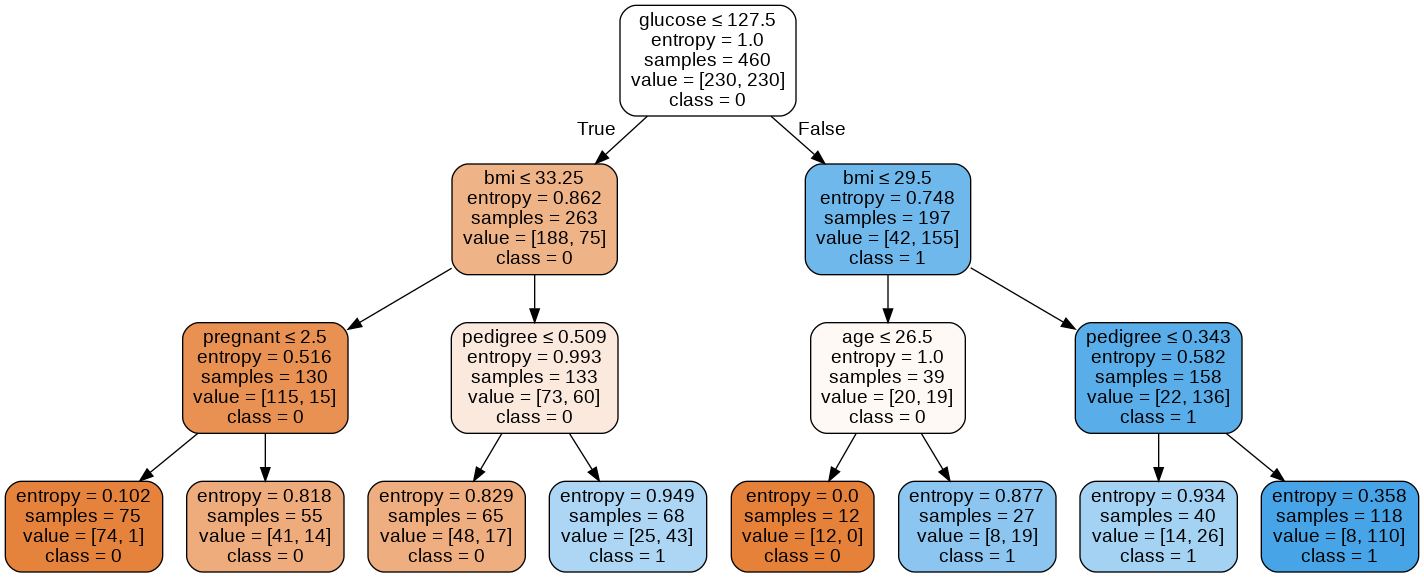

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
data_cols=['pregnant', 'glucose', 'bp', 'bmi', 'pedigree', 'age']
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = data_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

Association rule mining 

In [ ]:
!pip install apyori

Change Continues Variables to Categorical Variables 

In [ ]:
# Seee the ranges of each variables 
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])


diabetes_df.apply(minMax)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
min,0,56.0,24.0,7.0,14.0,18.2,0.085,21,0
max,17,198.0,110.0,63.0,335.0,67.1,2.420,81,1


In [ ]:
diabetes_df_O=diabetes_df.copy()

Pregnant: low (1,2), medium (3,4,5), high (> 6) 
Plasma–Glucose: low (< 90), medium (90–150), 
high (> 150) 
Diastolic-BP: normal (< 80), Prehypertension (80–89), 
high (> 90) 
BMI: low (< 25), normal (25–30), obese (30–35), severely 
obese (> 35) 
Age: 20–39(young), 40–59(medium), 60 plus (high) 
DiabetesPedigreeFunctioN: low(<0.92) ,meduim(0.93 -1.755) ,high >1.176
Insulin : low(<142 ) ,meduim (142-270) , high (271 >)
Class: yes (1), no (0) 


In [ ]:
df_diabetes_new['Pregnancies']=pd.cut(df_diabetes_new.Pregnancies,bins=[-1,2,5,17],labels=['Pregnant_Low','Pregnant_Medium','Pregnant_High'])

df_diabetes_new['Glucose']=pd.cut(df_diabetes_new.Glucose,bins=[-1,89,150,199],labels=['Glucose_Low','Glucose_Medium','Glucose_High'])

df_diabetes_new['BloodPressure']=pd.cut(df_diabetes_new.BloodPressure,bins=[-1,80,90,111],labels=['BloodPressure_Normal','BloodPressure_Prehypertension','BloodPressure_High'])

df_diabetes_new['BMI']=pd.cut(df_diabetes_new.BMI,bins=[-1,24,30,35,68],labels=['BMI_Low','BMI_Normal','BMI_Obese','BMI_Severly_Obese'])

df_diabetes_new['DiabetesPedigreeFunction']=pd.cut(df_diabetes_new.DiabetesPedigreeFunction,bins=[-1,0.39,0.8,2.42],labels=['DPF_Low','DPF_Medium','DPF_High'])

#diabetes_df['Insulin']=pd.cut(diabetes_df.Insulin,bins=[-1,141,270,370.0],labels=['Insulin_Low','Insulin_Medium','Insulin_High'])

#diabetes_df['SkinThickness']=pd.cut(diabetes_df.SkinThickness,bins=[-1,30,54,64],labels=['SkinThickness_Low','SkinThickness_Medium','SkinThickness_High'])

df_diabetes_new['Age']=pd.cut(df_diabetes_new.Age,bins=[19,39,59,81],labels=['Young','Medium_age','Old'])

df_diabetes_new['Outcome']=pd.cut(df_diabetes_new.Outcome,bins=[-1,0,2],labels=['No_Diabetes','Yes_Diabetes'])

In [ ]:
df_diabetes_new=df_diabetes_new.reset_index(drop=True)
df_diabetes_new.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,Pregnant_Low,Glucose_Low,BloodPressure_Normal,BMI_Normal,DPF_Low,Young,No_Diabetes
1,Pregnant_Low,Glucose_Medium,BloodPressure_Normal,BMI_Severly_Obese,DPF_High,Young,Yes_Diabetes
2,Pregnant_Medium,Glucose_Low,BloodPressure_Normal,BMI_Obese,DPF_Low,Young,Yes_Diabetes
3,Pregnant_Medium,Glucose_High,BloodPressure_Normal,BMI_Normal,DPF_Medium,Medium_age,Yes_Diabetes
4,Pregnant_Low,Glucose_Medium,BloodPressure_Prehypertension,BMI_Severly_Obese,DPF_Medium,Young,Yes_Diabetes


In [ ]:
from apyori import apriori

l=df_diabetes_new.shape[0]
c=df_diabetes_new.shape[1]

records = []
for i in range(0, l):
    records.append([str(df_diabetes_new.values[i,j]) for j in range(0, c)])

In [ ]:
association_rules = apriori(records, min_support=0.040, min_confidence=0.75, min_lift=2, min_length=8)
association_results = list(association_rules)

In [ ]:
print(len(association_results))

21


In [ ]:
print(association_results)

[RelationRecord(items=frozenset({'Glucose_High', 'Yes_Diabetes'}), support=0.12771739130434784, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Glucose_High'}), items_add=frozenset({'Yes_Diabetes'}), confidence=0.7580645161290324, lift=2.4258064516129036)]), RelationRecord(items=frozenset({'BMI_Severly_Obese', 'Glucose_High', 'Yes_Diabetes'}), support=0.059782608695652176, ordered_statistics=[OrderedStatistic(items_base=frozenset({'BMI_Severly_Obese', 'Glucose_High'}), items_add=frozenset({'Yes_Diabetes'}), confidence=0.7857142857142857, lift=2.5142857142857142)]), RelationRecord(items=frozenset({'BMI_Severly_Obese', 'Pregnant_High', 'Medium_age'}), support=0.06521739130434782, ordered_statistics=[OrderedStatistic(items_base=frozenset({'BMI_Severly_Obese', 'Medium_age'}), items_add=frozenset({'Pregnant_High'}), confidence=0.7999999999999999, lift=3.7743589743589743)]), RelationRecord(items=frozenset({'BloodPressure_Normal', 'Pregnant_High', 'Medium_age'}), support=0.0815217

In [ ]:
for item in association_results:

    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    if len(items)==2 and (('No_Diabetes' in items ) or 'Yes_Diabetes' in items ) :
        print("Rule: " + items[0] + " -> " + items[1])
         #second index of the inner list
        print("Support: " + str(item[1]))

        #third index of the list located at 0th
        #of the third index of the inner list

        print("Confidence: " + str(item[2][0][2]))
        print("Lift: " + str(item[2][0][3]))
        print("=====================================")

    if len(items)==3 and (('No_Diabetes' in items ) or 'Yes_Diabetes' in items ):
        print("Rule: " + items[0] + " -> " + items[1]+ " -> " + items[2])
        #second index of the inner list
        print("Support: " + str(item[1]))

        #third index of the list located at 0th
        #of the third index of the inner list

        print("Confidence: " + str(item[2][0][2]))
        print("Lift: " + str(item[2][0][3]))
        print("=====================================")
    
    if len(items)==4 and (('No_Diabetes' in items ) or 'Yes_Diabetes' in items ):
        print("Rule: " + items[0] + " -> " + items[1]+ " -> " + items[2] + " -> " + items[3])
        #second index of the inner list
        print("Support: " + str(item[1]))

        #third index of the list located at 0th
        #of the third index of the inner list

        print("Confidence: " + str(item[2][0][2]))
        print("Lift: " + str(item[2][0][3]))
        print("=====================================")
        
    if len(items)==5 and (('No_Diabetes' in items ) or 'Yes_Diabetes' in items ):
        print("Rule: " + items[0] + " -> " + items[1]+ " -> " + items[2] + " -> " + items[3] + " -> " + items[4])
         #second index of the inner list
        print("Support: " + str(item[1]))

        #third index of the list located at 0th
        #of the third index of the inner list

        print("Confidence: " + str(item[2][0][2]))
        print("Lift: " + str(item[2][0][3]))
        print("=====================================")
    
    if len(items)==6 and (('No_Diabetes' in items ) or 'Yes_Diabetes' in items ):
        print("Rule: " + items[0] + " -> " + items[1]+ " -> " + items[2] + " -> " + items[3] + " -> " + items[4] + " -> " + items[5])
         #second index of the inner list
        print("Support: " + str(item[1]))

        #third index of the list located at 0th
        #of the third index of the inner list

        print("Confidence: " + str(item[2][0][2]))
        print("Lift: " + str(item[2][0][3]))
        print("=====================================")

    if len(items)==7 and (('No_Diabetes' in items ) or 'Yes_Diabetes' in items ):
        print("Rule: " + items[0] + " -> " + items[1]+ " -> " + items[2] + " -> " + items[3] + " -> " + items[4] + " -> " + items[5]  + " -> " + items[6])
        #second index of the inner list
        print("Support: " + str(item[1]))

        #third index of the list located at 0th
        #of the third index of the inner list

        print("Confidence: " + str(item[2][0][2]))
        print("Lift: " + str(item[2][0][3]))
        print("=====================================")

    if len(items)==8 and (('No_Diabetes' in items ) or 'Yes_Diabetes' in items ):
        print("Rule: " + items[0] + " -> " + items[1]+ " -> " + items[2] + " -> " + items[3] + " -> " + items[4] + " -> " + items[5]  + " -> " + items[6] + " -> " + items[7])
         #second index of the inner list
        print("Support: " + str(item[1]))

        #third index of the list located at 0th
        #of the third index of the inner list

        print("Confidence: " + str(item[2][0][2]))
        print("Lift: " + str(item[2][0][3]))
        print("=====================================")
   

Rule: Glucose_High -> Yes_Diabetes
Support: 0.12771739130434784
Confidence: 0.7580645161290324
Lift: 2.4258064516129036
Rule: BMI_Severly_Obese -> Glucose_High -> Yes_Diabetes
Support: 0.059782608695652176
Confidence: 0.7857142857142857
Lift: 2.5142857142857142
Rule: Glucose_High -> Yes_Diabetes -> DPF_Medium
Support: 0.0625
Confidence: 0.8846153846153847
Lift: 2.830769230769231
Rule: Glucose_High -> Medium_age -> Yes_Diabetes
Support: 0.043478260869565216
Confidence: 0.8
Lift: 2.56
Rule: Glucose_High -> Pregnant_High -> Yes_Diabetes
Support: 0.051630434782608696
Confidence: 0.76
Lift: 2.432
Rule: Glucose_High -> Pregnant_Medium -> Yes_Diabetes
Support: 0.043478260869565216
Confidence: 0.8
Lift: 2.56
Rule: BMI_Severly_Obese -> Glucose_High -> Yes_Diabetes -> BloodPressure_Normal
Support: 0.04076086956521739
Confidence: 0.7894736842105263
Lift: 2.526315789473684
Rule: BMI_Severly_Obese -> Pregnant_High -> Yes_Diabetes -> DPF_Medium
Support: 0.04076086956521739
Confidence: 0.833333333333

TEST Association Rule Mining

In [ ]:
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
df_diabetes_new.groupby('Outcome').count()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,
No_Diabetes,253,253,253,253,253,253
Yes_Diabetes,115,115,115,115,115,115


In [ ]:
te=TransactionEncoder()
te_aray=te.fit(df_diabetes_new.values).transform(df_diabetes_new.values)
te_aray

array([[False,  True, False, ..., False, False,  True],
       [False, False, False, ..., False,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       ...,
       [False,  True, False, ..., False, False,  True],
       [False, False,  True, ..., False, False, False],
       [False,  True, False, ...,  True, False,  True]])

In [ ]:
df=pd.DataFrame(te_aray,columns=te.columns_)
df

,BMI_Low,BMI_Normal,BMI_Obese,BMI_Severly_Obese,BloodPressure_High,BloodPressure_Normal,BloodPressure_Prehypertension,DPF_High,DPF_Low,DPF_Medium,Glucose_High,Glucose_Low,Glucose_Medium,Medium_age,No_Diabetes,Old,Pregnant_High,Pregnant_Low,Pregnant_Medium,Yes_Diabetes,Young
0,False,True,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True
1,False,False,False,True,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,True,True
2,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,True,True,True
3,False,True,False,False,False,True,False,False,False,True,True,False,False,True,False,False,False,False,True,True,False
4,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,False,False,False,True,False,True,False,False,True,False,False,False,True,False,True,False,False,True,False,False,True
364,False,False,False,True,False,False,True,True,False,False,False,False,True,False,False,False,False,True,False,True,True
365,False,True,False,False,False,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True
366,False,False,True,False,False,True,False,False,True,False,False,False,True,False,True,True,True,False,False,False,False


In [ ]:
from mlxtend.frequent_patterns import apriori,association_rules

frq_items = apriori(df, min_support = 0.03, use_colnames = True) 

# Collecting the inferred rules in a dataframe 
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules_ = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
print(rules_[['antecedents','consequents']])

                                            antecedents                                        consequents
6758        (BMI_Severly_Obese, Medium_age, DPF_Medium)                      (Pregnant_High, Yes_Diabetes)
3002        (BMI_Severly_Obese, Medium_age, DPF_Medium)                                    (Pregnant_High)
6750  (BMI_Severly_Obese, Medium_age, Yes_Diabetes, ...                                    (Pregnant_High)
3015        (BMI_Severly_Obese, Medium_age, DPF_Medium)                                     (Yes_Diabetes)
6751  (BMI_Severly_Obese, Pregnant_High, Medium_age,...                                     (Yes_Diabetes)
...                                                 ...                                                ...
218                                             (Young)                              (BMI_Low, DPF_Medium)
319                                             (Young)                             (BMI_Normal, DPF_High)
1626                                 

In [ ]:
rules_[ (rules_['consequents'] == {'No_Diabetes'}) & (rules_['confidence'] == 1)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
193,"(BMI_Low, DPF_Low)",(No_Diabetes),0.043478,0.6875,0.043478,1.0,1.454545,0.013587,inf
364,"(BMI_Normal, Glucose_Low)",(No_Diabetes),0.054348,0.6875,0.054348,1.0,1.454545,0.016984,inf
1380,"(BMI_Low, DPF_Low, BloodPressure_Normal)",(No_Diabetes),0.040761,0.6875,0.040761,1.0,1.454545,0.012738,inf
1506,"(BMI_Low, DPF_Low, Glucose_Medium)",(No_Diabetes),0.038043,0.6875,0.038043,1.0,1.454545,0.011889,inf
1534,"(BMI_Low, DPF_Low, Young)",(No_Diabetes),0.040761,0.6875,0.040761,1.0,1.454545,0.012738,inf
1546,"(BMI_Low, Pregnant_Low, Glucose_Medium)",(No_Diabetes),0.043478,0.6875,0.043478,1.0,1.454545,0.013587,inf
1742,"(BloodPressure_Normal, BMI_Normal, Glucose_Low)",(No_Diabetes),0.051630,0.6875,0.051630,1.0,1.454545,0.016135,inf
1913,"(DPF_Low, BMI_Normal, Glucose_Low)",(No_Diabetes),0.035326,0.6875,0.035326,1.0,1.454545,0.011039,inf
2075,"(Pregnant_Low, BMI_Normal, Glucose_Low)",(No_Diabetes),0.038043,0.6875,0.038043,1.0,1.454545,0.011889,inf
2089,"(Young, BMI_Normal, Glucose_Low)",(No_Diabetes),0.054348,0.6875,0.054348,1.0,1.454545,0.016984,inf


In [ ]:
rules_[ (rules_['consequents'] == {'Yes_Diabetes'}) & (rules_['confidence'] >= 0.75) & (rules_['lift'] >= 1) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3015,"(BMI_Severly_Obese, Medium_age, DPF_Medium)",(Yes_Diabetes),0.032609,0.3125,0.032609,1.000000,3.200000,0.022418,inf
6751,"(BMI_Severly_Obese, Pregnant_High, Medium_age,...",(Yes_Diabetes),0.032609,0.3125,0.032609,1.000000,3.200000,0.022418,inf
4123,"(Glucose_High, Young, DPF_Medium)",(Yes_Diabetes),0.048913,0.3125,0.043478,0.888889,2.844444,0.028193,6.187500
1141,"(Glucose_High, DPF_Medium)",(Yes_Diabetes),0.070652,0.3125,0.062500,0.884615,2.830769,0.040421,5.958333
4314,"(Glucose_High, Pregnant_High, Medium_age)",(Yes_Diabetes),0.040761,0.3125,0.035326,0.866667,2.773333,0.022588,5.156250
2973,"(BMI_Severly_Obese, Glucose_High, DPF_Medium)",(Yes_Diabetes),0.038043,0.3125,0.032609,0.857143,2.742857,0.020720,4.812500
7226,"(BloodPressure_Normal, Glucose_High, Young, DP...",(Yes_Diabetes),0.038043,0.3125,0.032609,0.857143,2.742857,0.020720,4.812500
3037,"(BMI_Severly_Obese, Pregnant_High, DPF_Medium)",(Yes_Diabetes),0.048913,0.3125,0.040761,0.833333,2.666667,0.025476,4.125000
3442,"(BloodPressure_Normal, Glucose_High, DPF_Medium)",(Yes_Diabetes),0.046196,0.3125,0.038043,0.823529,2.635294,0.023607,3.895833
1238,"(Glucose_High, Medium_age)",(Yes_Diabetes),0.054348,0.3125,0.043478,0.800000,2.560000,0.026495,3.437500


Eclat Algorithm 

In [ ]:
frequent_itemsets = apriori(df, min_support=0.015, use_colnames=True)
#bulid association rules using support metric
rules_Eclat = association_rules(frequent_itemsets, metric="support", support_only=True, min_threshold=0.04)
#use only support metric in Eclat algo using apriori

In [ ]:
rules_Eclat[ (rules_Eclat['consequents'] == {'No_Diabetes'}) & (rules_Eclat['support'] >=0.40)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
108,(BloodPressure_Normal),(No_Diabetes),NaN,NaN,0.589674,NaN,NaN,NaN,NaN
213,(Glucose_Medium),(No_Diabetes),NaN,NaN,0.505435,NaN,NaN,NaN,NaN
232,(Pregnant_Low),(No_Diabetes),NaN,NaN,0.429348,NaN,NaN,NaN,NaN
237,(Young),(No_Diabetes),NaN,NaN,0.611413,NaN,NaN,NaN,NaN
1201,"(BloodPressure_Normal, Glucose_Medium)",(No_Diabetes),NaN,NaN,0.432065,NaN,NaN,NaN,NaN
1273,"(BloodPressure_Normal, Young)",(No_Diabetes),NaN,NaN,0.532609,NaN,NaN,NaN,NaN
1790,"(Glucose_Medium, Young)",(No_Diabetes),NaN,NaN,0.448370,NaN,NaN,NaN,NaN
1848,"(Pregnant_Low, Young)",(No_Diabetes),NaN,NaN,0.418478,NaN,NaN,NaN,NaN


In [ ]:
rules_Eclat[ (rules_Eclat['consequents'] == {'Yes_Diabetes'})]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
31,(BMI_Normal),(Yes_Diabetes),NaN,NaN,0.043478,NaN,NaN,NaN,NaN
61,(BMI_Obese),(Yes_Diabetes),NaN,NaN,0.114130,NaN,NaN,NaN,NaN
90,(BMI_Severly_Obese),(Yes_Diabetes),NaN,NaN,0.149457,NaN,NaN,NaN,NaN
116,(BloodPressure_Normal),(Yes_Diabetes),NaN,NaN,0.217391,NaN,NaN,NaN,NaN
136,(BloodPressure_Prehypertension),(Yes_Diabetes),NaN,NaN,0.076087,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
7117,"(BloodPressure_Normal, BMI_Severly_Obese, Preg...",(Yes_Diabetes),NaN,NaN,0.040761,NaN,NaN,NaN,NaN
7388,"(BMI_Severly_Obese, Pregnant_Low, Young, Gluco...",(Yes_Diabetes),NaN,NaN,0.040761,NaN,NaN,NaN,NaN
7928,"(BloodPressure_Normal, DPF_Medium, Young, Gluc...",(Yes_Diabetes),NaN,NaN,0.040761,NaN,NaN,NaN,NaN
7988,"(BloodPressure_Normal, Pregnant_Low, Young, DP...",(Yes_Diabetes),NaN,NaN,0.043478,NaN,NaN,NaN,NaN


FP-Growth Algorithm

In [ ]:
!pip install -U mlxtend

Requirement already up-to-date: mlxtend in /usr/local/lib/python3.7/dist-packages (0.18.0)


In [ ]:
from mlxtend.frequent_patterns.fpgrowth import fpgrowth

fpgrowth_item=fpgrowth(df, min_support=0.045, use_colnames=True)

In [ ]:
fpgrowth_rules=association_rules(fpgrowth_item, metric="confidence", min_threshold=0.75)
fpgrowth_item.tail()

,support,itemsets
657,0.051630,"(BMI_Low, Pregnant_Low, No_Diabetes)"
658,0.054348,"(BMI_Low, Pregnant_Low, Young, BloodPressure_N..."
659,0.051630,"(BMI_Low, Pregnant_Low, Young, No_Diabetes)"
660,0.051630,"(BMI_Low, Pregnant_Low, BloodPressure_Normal, ..."
661,0.051630,"(BMI_Low, BloodPressure_Normal, Young, No_Diab..."


In [ ]:
fpgrowth_rules_ = fpgrowth_rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
print(fpgrowth_rules_[['antecedents','consequents']])

                                           antecedents             consequents
279  (Pregnant_Low, Glucose_Medium, BMI_Normal, DPF...    (No_Diabetes, Young)
358                          (BMI_Normal, Glucose_Low)    (No_Diabetes, Young)
368    (BloodPressure_Normal, BMI_Normal, Glucose_Low)    (No_Diabetes, Young)
145  (Pregnant_Low, Young, BMI_Normal, Glucose_Medium)           (No_Diabetes)
154  (BMI_Normal, BloodPressure_Normal, Young, Preg...           (No_Diabetes)
..                                                 ...                     ...
412           (BMI_Severly_Obese, Pregnant_Low, Young)  (BloodPressure_Normal)
822                          (No_Diabetes, Medium_age)  (BloodPressure_Normal)
831                          (Glucose_High, BMI_Obese)  (BloodPressure_Normal)
845                        (Pregnant_High, DPF_Medium)  (BloodPressure_Normal)
484                       (BMI_Severly_Obese, DPF_Low)                 (Young)

[932 rows x 2 columns]


In [ ]:
fpgrowth_rules_[ (fpgrowth_rules_['consequents'] == {'No_Diabetes'}) & (fpgrowth_rules_['confidence'] == 1)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
145,"(Pregnant_Low, Young, BMI_Normal, Glucose_Medium)",(No_Diabetes),0.103261,0.6875,0.103261,1.0,1.454545,0.032269,inf
154,"(BMI_Normal, BloodPressure_Normal, Young, Preg...",(No_Diabetes),0.086957,0.6875,0.086957,1.0,1.454545,0.027174,inf
181,"(Pregnant_Low, DPF_Low, BMI_Normal, Young)",(No_Diabetes),0.054348,0.6875,0.054348,1.0,1.454545,0.016984,inf
190,"(BMI_Normal, BloodPressure_Normal, DPF_Low, Yo...",(No_Diabetes),0.046196,0.6875,0.046196,1.0,1.454545,0.014436,inf
269,"(Pregnant_Low, Glucose_Medium, BMI_Normal, DPF...",(No_Diabetes),0.051630,0.6875,0.051630,1.0,1.454545,0.016135,inf
275,"(BMI_Normal, Young, Pregnant_Low, Glucose_Medi...",(No_Diabetes),0.051630,0.6875,0.051630,1.0,1.454545,0.016135,inf
354,"(BMI_Normal, Glucose_Low)",(No_Diabetes),0.054348,0.6875,0.054348,1.0,1.454545,0.016984,inf
357,"(Young, BMI_Normal, Glucose_Low)",(No_Diabetes),0.054348,0.6875,0.054348,1.0,1.454545,0.016984,inf
362,"(BloodPressure_Normal, BMI_Normal, Glucose_Low)",(No_Diabetes),0.051630,0.6875,0.051630,1.0,1.454545,0.016135,inf
365,"(BloodPressure_Normal, Young, BMI_Normal, Gluc...",(No_Diabetes),0.051630,0.6875,0.051630,1.0,1.454545,0.016135,inf


In [ ]:
fpgrowth_rules_[ (fpgrowth_rules_['consequents'] == {'Yes_Diabetes'}) & (fpgrowth_rules_['confidence'] >= 0.75) & (fpgrowth_rules_['lift'] >= 1) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
824,"(Glucose_High, DPF_Medium)",(Yes_Diabetes),0.070652,0.3125,0.062500,0.884615,2.830769,0.040421,5.958333
833,"(BMI_Severly_Obese, Glucose_High)",(Yes_Diabetes),0.076087,0.3125,0.059783,0.785714,2.514286,0.036005,3.208333
834,"(Glucose_High, Pregnant_High)",(Yes_Diabetes),0.067935,0.3125,0.051630,0.760000,2.432000,0.030401,2.864583
823,(Glucose_High),(Yes_Diabetes),0.168478,0.3125,0.127717,0.758065,2.425806,0.075068,2.841667
818,"(BMI_Severly_Obese, Pregnant_High, Medium_age)",(Yes_Diabetes),0.065217,0.3125,0.048913,0.750000,2.400000,0.028533,2.750000
